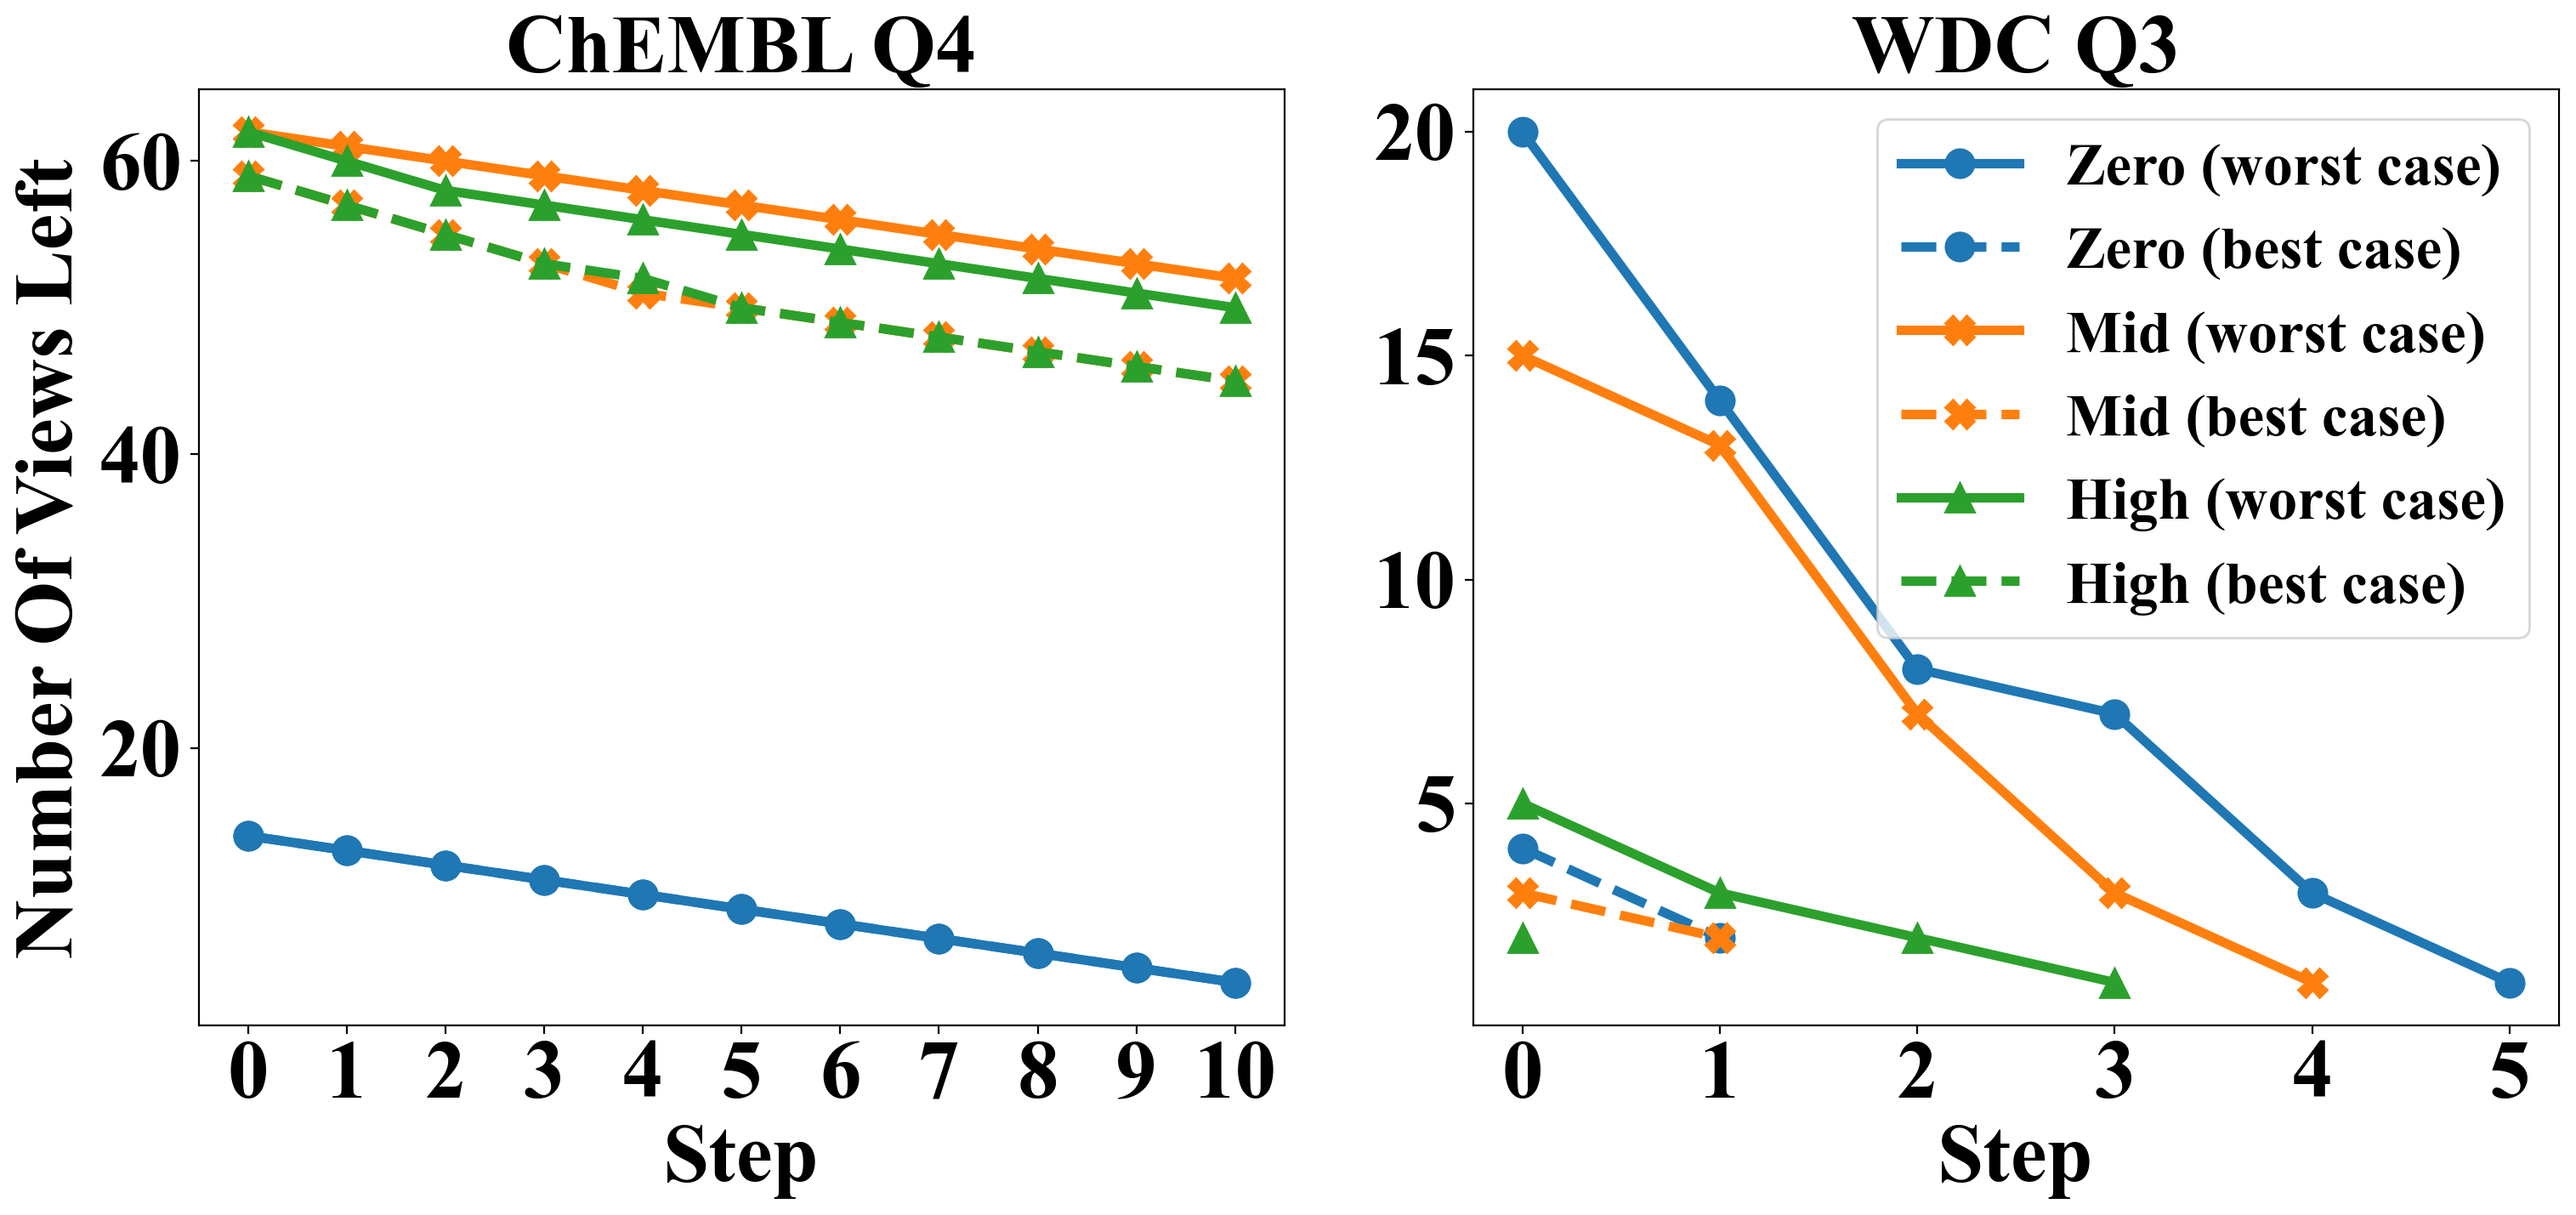

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "35"
plt.rcParams["font.weight"] = "bold"

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'][:3]
markers = ['o', 'X', '^']

# chembl
# 23,17,14,14,14,[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4],[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4]
# 83,74,68,62,59,[62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52],[59, 57, 55, 53, 51, 50, 49, 48, 47, 46, 45]
# 83,74,68,62,59,[62, 60, 58, 57, 56, 55, 54, 53, 52, 51, 50],[59, 57, 55, 53, 52, 50, 49, 48, 47, 46, 45]

# wdc
# 20,20,20,20,4,[20, 14, 8, 7, 3, 1],[4, 2]
# 15,15,15,15,3,[15, 13, 7, 3, 1],[3, 2]
# 5,5,5,5,2,[5, 3, 2, 1],[2]

worst_cases = [[[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4], [62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52], [62, 60, 58, 57, 56, 55, 54, 53, 52, 51, 50]],
               [[20, 14, 8, 7, 3, 1], [15, 13, 7, 3, 1], [5, 3, 2, 1]]]
best_cases = [[[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4], [59, 57, 55, 53, 51, 50, 49, 48, 47, 46, 45], [59, 57, 55, 53, 52, 50, 49, 48, 47, 46, 45]],
              [[4, 2], [3, 2], [2]]]

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

for i in range(2):
    ax[i].yaxis.get_major_locator().set_params(integer=True)
    max_len = max([len(l) for l in worst_cases[i]])
    x_axis = [j for j in range(max_len)]

    for j, noise in enumerate(["Zero", "Mid", "High"]):

        worst_case = worst_cases[i][j]
        best_case = best_cases[i][j]

        worst_case += [np.nan] * (len(x_axis) - len(worst_case))
        best_case += [np.nan] * (len(x_axis) - len(best_case))

        if i == 1:
            ax[i].plot(x_axis, worst_case, color=colors[j], linewidth=4, linestyle='-', markersize=12, marker=markers[j], label=noise + " (worst case)")
            ax[i].plot(x_axis, best_case, color=colors[j], linewidth=4, linestyle='--', markersize=12, marker=markers[j], label=noise + " (best case)")
        else:
            ax[i].plot(x_axis, worst_case, color=colors[j], linewidth=4, linestyle='-', markersize=12, marker=markers[j])
            ax[i].plot(x_axis, best_case, color=colors[j], linewidth=4, linestyle='--', markersize=12, marker=markers[j])

    # fig.subplots_adjust(bottom=0.3, wspace=0.33)
    ax[i].set_xticks(x_axis)
    if i == 0:
        ax[i].set_title("ChEMBL Q4", fontweight='bold', fontsize='35')
    else:
        ax[i].set_title("WDC Q3", fontweight='bold', fontsize='35')

ax[1].legend(fontsize='25')
for a in ax.flat:
    a.set_xlabel('Step', fontweight='bold', fontsize='35')
    # a.set_ylabel('Number Of Views Left', fontweight='bold', fontsize='35')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for a in ax.flat:
#     a.label_outer()
# y_ticks = [i for i in range(min(best_case), max(worst_case) + 1)]
# plt.yticks(y_ticks)
# plt.title("Number of views left at each step after pruning using contradictory signals")
ax[0].set_ylabel('Number Of Views Left', fontweight='bold', fontsize='35')
plt.tight_layout()
plot_fn = "../figures/num_views_left.pdf"
plt.savefig(plot_fn)
plt.show()
plt.close()